# Machine Learning: HW 5
Juan Vila

## Part 1

### A

Since we are calculating P(x,y) is a generative model

### B

$$L(x_i| \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_i}e^{-\lambda}}{x_i!}$$
$$l(x_i| \lambda) = \sum_{i=1}^{n} ln(\lambda) x_i -\lambda-ln(x_i!)$$
$$ \frac{\partial l(x_i| \lambda)}{\partial \lambda} = \sum_{i=1}^{n} \frac{ x_i}{\lambda} -1$$
$$  \hat{\lambda}= \sum_{i=1}^{n} \frac{ x_i}{n}$$

### C

We know that since is we are applying a Naive Bayes model, we have that $P(x,y) = p(y)p(x/y)$, then we know that $p(y)=p_1^{n}p_0^{(N-n)}$ also we know that $p_0 =  1-p_1$. Then $p(y)=p_1^{n}(1-p_1)^{(N-n)}$ . We know for MLE estimation that $ \hat{p}_1 = \frac{\sum numberofcases c=1}{sumallofcases} $



On the case of $p(x_i/y=c)$ ~ Poisson($\lambda_c,X_i|y=c)$, were c $\epsilon$ {1,0}. This means when we construct the likehood function we get:

$$P(x/y )= \prod_{i=1}^{N} P(X_i|\lambda_c , Y=c) $$

Then the joint distribution is:

$$P(x,y )= p_1^{n}(1-p_1)^{(N-n)}\prod_{i=1}^{N} P(X_i|\lambda_c , Y=c) $$

Then if we divide by the value of P(X), but we know that P(X) is not dependent in Y, meaning that not affect the optimization problem, then:

$$P(Y/X )= \frac{p_1^{n}(1-p_1)^{(N-n)}\prod_{i=1}^{N} P(X_i|\lambda_c , Y=c)}{P(X)} $$
$$P(Y/X ) \propto p_1^{n}(1-p_1)^{(N-n)}\prod_{i=1}^{N} P(X_i|\lambda_c , Y=c) $$

### D

For solving for the boundery we need to solve the following equation:

$$ P(y=1) \prod_{i=1}^{n_1} P(X_i|\hat{\lambda}_1 , Y=1) = P(y=0) \prod_{i=1}^{n_0} P(X_i|\hat{\lambda}_0 , Y=0)$$
$$ y=f(x) =ln\left( \frac{P(y=1) \prod_{i=1}^{n_1} P(X_i|\hat{\lambda}_1 , Y=1)}{ P(y=0) \prod_{i=1}^{n_0} P(X_i|\hat{\lambda}_0 , Y=0)}\right) $$

$$ ln\left( \frac{P(y=1)}{P(y=0) }\right) + ln\left( \frac{\prod_{i=1}^{n_1} P(X_i|\hat{\lambda_1} , Y=1)}{ \prod_{i=1}^{n_0} P(X_i|\hat{\lambda_0} , Y=0)}\right) $$

$$ ln\left( \frac{\hat{p}_1}{1-\hat{p}_1 }\right) + ln\left( \frac{\prod_{i=1}^{n}\frac{\hat{\lambda}_1^{x_i}e^{-\hat{\lambda}_1}}{x_i!}}{ \prod_{i=1}^{n} \frac{\hat{\lambda}_0^{x_i}e^{-\hat{\lambda}_0}}{x_i!}}\right) $$

$$ ln\left( \frac{\hat{p}_1}{1-\hat{p}_1 }\right) + ln\left( \frac{\prod_{i=1}^{n}\hat{\lambda}_1^{x_i}e^{-\hat{\lambda}_1}}{\prod_{i=1}^{}\hat{\lambda}_0^{x_i}e^{-\hat{\lambda}_0}}\right) $$


$$ ln\left( \frac{\hat{p}_1}{1-\hat{p}_1 }\right) + n(\hat{\lambda}_0- \hat{\lambda}_1) +  \sum_{i=1}^{n}ln(\hat{\lambda}_1-\hat{\lambda}_0)x_i $$

Now we can replace $ a=  ln\left( \frac{\hat{p}_1}{1-\hat{p}_1 }\right) + n(\hat{\lambda}_0- \hat{\lambda}_1) $ and $b=ln(\hat{\lambda}_1-\hat{\lambda}_0)$ . Now following the logic of this equations we can see that if right side part of the first equation is greater than the left part (i.e. $P(y=1)P(X|Y=1)>P(y=0)P(X|Y=0$) implies that the predicted label is y=1. This is reflected in the following equation:

$$ a +  \sum_{i=1}^{n}b x_i $$

\begin{equation*}
    y_{pred}=
    \begin{cases}
      1,& for & a +  \sum_{i=1}^{n}b x_i >0 \\
     0,& otherwise
    \end{cases}
\end{equation*}


### E

We can build the bayes optimal classifier as :


\begin{equation*}
    C(y_{pred},y_{true})=1-\delta=
    \begin{cases}
      1,& if & y_{true}!=y_{pred} \\
     0,& otherwise
    \end{cases}
\end{equation*}


Where $\delta$ is the Kronecker Delta function then if we replace in the this classifier we can see that:
$$C_x(y_{pred},y_{true})=\sum_{y_{true}} C(y_{pred},y_{true}) P(Y=y_{true}|X) $$
$$C_x(y_{pred},y_{true})=\sum_{y_{true}} (1-\delta) P(Y=y_{true}|X) $$
$$C_x(y_{pred},y_{true})=\sum_{y_{true}}  P(Y=y_{true}|X)dy_{true} -\sum_{y_{true}} \delta P(Y=y_{true}|X) $$
$$C_x(y_{pred},y_{true})=1 - P(Y=y_{pred}|X) $$

Now we can see that have the same expression that know that if we maximize the probability of predict the label can be achive minimizing the loss function. Since we normally would do y=argmax $ P(Y=y_{pred}|X)$, then is the same that minimize 1- $ P(Y=y_{pred}|X)$ which is the minimization of the error of the label, which is minimize the cost function.


## Part 2

$$ E = -\sum_{n=1}^{N}\sum_{k=1}^{K} \tau_{nk}ln\left(\frac{exp(a_k^T X_n)}{\sum_{j=1}^{K}exp(a_j^T X_n)}\right) $$
$$ E = -\sum_{n=1}^{N}\sum_{k=1}^{K} \tau_{nk}\left[a_k^T X_n -ln\left(\sum_{j=1}^{K}exp(a_j^T X_n)\right)\right ] $$
$$ \frac{\partial E}{\partial a_k} = \sum_{n=1}^{N} \tau_{nk}\frac{exp(a_k^T X_n)}{\sum_{j=1}^{K}exp(a_j^T X_n)}X_n -\tau_{nk}X_n +\tau_{nk!=k} \frac{exp(a_k^T X_n)}{\sum_{j=1}^{K}exp(a_j^T X_n)}X_n  $$


Now we can see that we have a  $\tau$ for k and another for the other values of K!=k, multipliying the $P[Y=k|X_n,a_k]$ , then this implies $\tau$ converts into a 1, then desapears. Now if we replace using this fact we get the follwing expresion. If we replace by the fact that $P[Y=k|X_n,a_k]=\frac{exp(a_k^T X_n)}{\sum_{j=1}^{K}exp(a_j^T X_n)}$ we get:

$$ \frac{\partial E}{\partial a_k} = \sum_{n=1}^{N} X_n \left[\frac{exp(a_k^T X_n)}{\sum_{j=1}^{K}exp(a_j^T X_n)} -\tau_{nk}\right ] $$

$$ \frac{\partial E}{\partial a_k} = \sum_{n=1}^{N} X_n \left[P[Y=k|X_n,a_k] -\tau_{nk}\right ] $$

## Part 3 

In [1131]:
# python
import numpy as np
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn . datasets import make_classification
X , y = make_classification ( n_features =2 ,n_redundant =0 ,n_informative =2 ,random_state =1 ,n_clusters_per_class =1)
rng = np . random . RandomState (2)
X += 2 * rng . uniform ( size = X . shape )
linearly_separable = (X , y )
X = StandardScaler (). fit_transform ( X )
X_train , X_test , y_train , y_test = \
train_test_split (X , y , test_size =.4 , random_state =42)

# Initialize fitting parameters
initial_theta = np . zeros (( X . shape [1] , 1))
# Set regularization parameter lambda and learning rate eta
Lambda = 0.1
Eta = 0.01

y_train = np.where(y_train == 0 , -1,1)
y_test = np.where(y_test == 0 , -1,1)

### A

In [1159]:
def lossFunction ( theta , X , y , Lambda ,index):
#
# IMPLEMENT THE LOSS AND GRADIENT FUNCTION
# OF REGULARIZED LOGISTIC REGRESSION
#
#
    loss=0
    for ind, val in enumerate(X):
        z = np.log(1 + np.exp(-y[ind] * np.dot(np.transpose(theta),X[ind]))) +  Lambda*(theta**2).sum()
        loss = loss + z[0]
    
    grad = (y[index]*X[index])

    grad2 = 1/(1+np.exp(y[index] * np.dot(np.transpose(theta),np.transpose(X[index])) ))
    
    grad3 = grad * grad2


    grad4 = grad3.reshape(theta.shape[0],1)


    return loss ,grad4

def gradientDescent(X ,y , theta , eta , Lambda , tolerance ):
#
# IMPLEMENT THE ( STOCHASTIC ) GRADIENT DESCENT ALGORITHM
# USING THE lossFunction DEFINED ABOVE
#
#
    import time

    start = time.time()
    p=X.shape[1]
    index = np.random.choice(X.shape[0], 1, replace=False) 
    i=0
    L=[0]
    theta_t_1 =  theta.copy()
    
    while True:
        theta_t = theta_t_1.reshape(p,1)*(1- 2*Lambda*eta) + eta*lossFunction(theta_t_1 , X , y , Lambda,index)[1].reshape(p,1)
        i+=1
        #print("log-likehood:{}, iteration:{} ".format(lossFunction(theta_t_1 , X , y , Lambda,index )[0],i))
        L.append(lossFunction(theta_t , X , y , Lambda,index )[0])
        index = np.random.choice(X.shape[0], 1, replace=False)
        if(abs(L[len(L)-1] - L[len(L)-2])) < tolerance:
            break
        
        theta_t_1 = theta_t.copy()
  
    end = time.time()
    print("Execution time:{}".format(end - start))
    return theta_t,i,L


In [922]:
X_train_c = np.column_stack((X_train,np.ones([60,1])))
X_test_c = np.column_stack((X_test,np.ones([40,1])))

In [1101]:
test = np.random.rand(2,1)

In [1160]:
#X_train_c = np.stack(X_train,np.ones())
result_A = gradientDescent(X_train ,y_train , test,Eta , Lambda, 1e-5 )




Execution time:0.914686918258667


In [1161]:
test

array([[0.40151728],
       [0.67787076]])

In [1162]:
result_A[0]

array([[-0.86550388],
       [ 0.03292422]])

### B

Text(0, 0.5, '-Log()')

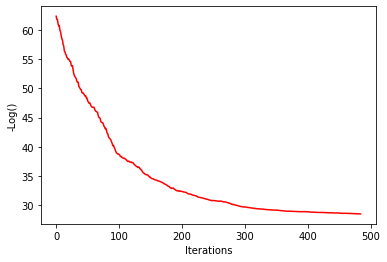

In [1163]:
import matplotlib.pyplot as plt
plt.plot(result_A[2][1:],color='r', label='error square')
plt.xlabel('Iterations')
plt.ylabel("-Log()")

### C

In [1164]:
y_hat_test = 1/(1+np.exp(-X_test@result_A[0]))
y_hat_train = 1/(1+np.exp(-X_train@result_A[0]))
y_predict_test = np.where(y_hat_test>.5,1,-1)
y_predict_train = np.where(y_hat_train>.5,1,-1)
acc_test = 0
acc_train = 0
for i, val in  enumerate(y_train):
    if y_train[i] == y_predict_train[i]  :
        acc_train= acc_train+ 1


for i, val in  enumerate(y_test):
    if y_test[i] == y_predict_test[i] :
        acc_test=acc_test+1
        
        
acc_test = acc_test/len(y_test) 
acc_train = acc_train/len(y_train)  

#acc_test = acc_test
#acc_train = acc_train



print("Training Accuracy:{}".format(acc_train))
print("Test Accuracy:{}".format(acc_test))


Training Accuracy:0.95
Test Accuracy:0.95


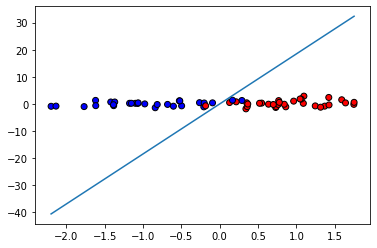

In [1157]:
from matplotlib.colors import ListedColormap


xx1_test = np.linspace( X_test [: , 0].min(), X_test [: , 0].max(),40)
bound_test = - xx1_test *result_A[0][0][0]/result_A[0][1][0]  #result_A[0][2][0]/result_A[0][1][0]*0

xx1_train = np.linspace( X_train [: , 0].min(), X_train [: , 0].max(),40)
bound_train = - xx1_train *result_A[0][0][0]/result_A[0][1][0] #result_A[0][2][0]/result_A[0][1][0]*0

x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02 # step size in the mesh
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,
np . arange ( y_min , y_max , h ))
# plot the dataset
cm = plt . cm . RdBu
cm_bright = ListedColormap (['#FF0000','#0000FF'])
# Plot the training points
plt . scatter ( X_train [: , 0] , X_train [: , 1] , c = y_train ,
cmap = cm_bright , edgecolors ='k')
plt.plot(xx1_train,bound_train)




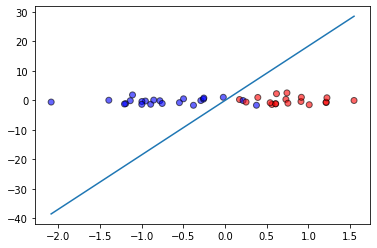

In [1158]:
# and test points
plt . scatter ( X_test [: , 0] , X_test [: , 1] , c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')
#plt.plot( X_test [: , 0],bound)
plt.plot(xx1_test,bound_test)